In [1]:
#import neccessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Specify the path to the README file using a raw string (r"...")
readme_path = r"C:\Users\DELL\Downloads\Dcs Files\README"

# Open the README file in read mode ('r')
with open(readme_path, 'r') as file:
    # Read the contents of the file and store them in the variable 'readme_contents'
    readme_contents = file.read()
# Displaying the first 2000 characters to get an overview
readme_contents[:2000]

"======================================================================\nDavid W. Aha\n9/27/88 \nComments on the Mushroom Database\n======================================================================\n\nI've replaced the original database twice.  \n   1. The database was lost due to backup/downtime problems here at\n      UCI.  I replaced the database with a version given to me by\n      Wayne Iba.  A brief check indicated that it was in good shape.\n   2. Jeff Schlimmer, donater of the database, recently mailed me a\n      copy of the database, with suitable 1-character acronymns for\n      attribute values (the size of the compressed database shrinks\n      from 120 to 50k).  \n\nI suspect that several people have had trouble copying the database over\nto their locations.  Please let me know if there is any problem in the \nfuture.\n\nThanks,\n    Dave Aha\n"

In [3]:
# Read the contents of the agaricus-lepiota.names file to check the attributes 
names_path = r"C:\Users\DELL\Downloads\Dcs Files\agaricus-lepiota.names"
with open(names_path, 'r') as file:
    names_contents = file.read()

# Displaying the first 800 characters to get an overview
names_contents[:800]


'1. Title: Mushroom Database\n\n2. Sources: \n    (a) Mushroom records drawn from The Audubon Society Field Guide to North\n        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred\n        A. Knopf\n    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)\n    (c) Date: 27 April 1987\n\n3. Past Usage:\n    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational\n       Adjustment (Technical Report 87-19).  Doctoral disseration, Department\n       of Information and Computer Science, University of California, Irvine.\n       --- STAGGER: asymptoted to 95% classification accuracy after reviewing\n           1000 instances.\n    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity\n       and Coverage in Incremental Concept Learning. In Proceedings of '

In [4]:
# Path to the data file
data_path = r"C:\Users\DELL\Downloads\Dcs Files\agaricus-lepiota.data"

# Reading the data into a pandas DataFrame
mushroom_data = pd.read_csv(data_path, header=None)

# Display the the DataFrame to understand its structure
mushroom_data.head()


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# Extracting attribute names from the .names file

#expression to find lines that might contain attribute names
attribute_pattern = re.compile(r'^\d+\.\s+(\w+)', re.MULTILINE)

# Extracting all matches
attribute_names = attribute_pattern.findall(names_contents)

# Adding a column name for the target variable (edible/poisonous)
if len(attribute_names) < mushroom_data.shape[1]:
    attribute_names = ['class'] + attribute_names

attribute_names


['class',
 'Title',
 'Sources',
 'Past',
 'Relevant',
 'Number',
 'Number',
 'Attribute',
 'Missing',
 'Class']

In [6]:
# Display a larger portion of the .names file to identify attribute names
names_contents[4000:6000]  # Display 2000 characters for a detailed review

"isonous\n    one.  The Guide clearly states that there is no simple rule for\n    determining the edibility of a mushroom; no rule like ``leaflets\n    three, let it be'' for Poisonous Oak and Ivy.\n\n5. Number of Instances: 8124\n\n6. Number of Attributes: 22 (all nominally valued)\n\n7. Attribute Information: (classes: edible=e, poisonous=p)\n     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,\n                                  knobbed=k,sunken=s\n     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s\n     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,\n                                  pink=p,purple=u,red=e,white=w,yellow=y\n     4. bruises?:                 bruises=t,no=f\n     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,\n                                  musty=m,none=n,pungent=p,spicy=s\n     6. gill-attachment:          attached=a,descending=d,free=f,notched=n\n     7. gill-spacing:            

In [11]:
# Assign the attribute names to the DataFrame columns
categorical_columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
    "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
    "ring-type", "spore-print-color", "population", "habitat"
]

mushroom_data.columns = categorical_columns

# Display the DataFrame with new column names
mushroom_data.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
# Display descriptive statistics of the DataFrame
mushroom_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [15]:
print(mushroom_data.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [16]:

# Apply one-hot encoding to the categorical columns
X = pd.get_dummies(mushroom_data.drop('class', axis=1))

# Assuming 'class' is already in a format suitable for modeling (e.g., binary classification)
y = mushroom_data['class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes Classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Evaluate the Naive Bayes Classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)


print(f"Naive Bayes Classifier Accuracy: {accuracy_nb}")
print("Confusion Matrix:\n", confusion_matrix_nb)
print("Classification Report:\n", classification_report_nb)


Naive Bayes Classifier Accuracy: 0.96
Confusion Matrix:
 [[778  65]
 [  0 782]]
Classification Report:
               precision    recall  f1-score   support

           e       1.00      0.92      0.96       843
           p       0.92      1.00      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [17]:
#modify Naive Bayes Classifier with a custom threshold of 0.4 to 
#ensure that no potentially poisonous mushrooms are misclassified as edible

# Get the predicted probabilities for the positive class
y_probabilities_nb = naive_bayes_classifier.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Define a new threshold
new_threshold = 0.4

# Apply the new threshold to determine class predictions
y_pred_custom_threshold = (y_probabilities_nb > new_threshold).astype(int)

# Map string labels to integers
# Assuming 'p' (poisonous) is the positive class and mapped to 1, 'e' (edible) to 0
y_test_int = y_test.map({'p': 1, 'e': 0})

# Evaluate the model with the new threshold
accuracy_custom = accuracy_score(y_test_int, y_pred_custom_threshold)
confusion_matrix_custom = confusion_matrix(y_test_int, y_pred_custom_threshold)
classification_report_custom = classification_report(y_test_int, y_pred_custom_threshold)


# Print results with the custom threshold
print(f"Naive Bayes Classifier Accuracy with Custom Threshold: {accuracy_custom}")
print("Confusion Matrix with Custom Threshold:\n", confusion_matrix_custom)
print("Classification Report with Custom Threshold:\n", classification_report_custom)


Naive Bayes Classifier Accuracy with Custom Threshold: 0.9581538461538461
Confusion Matrix with Custom Threshold:
 [[775  68]
 [  0 782]]
Classification Report with Custom Threshold:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       843
           1       0.92      1.00      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [18]:
# Initialize and train the Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree_classifier.predict(X_test)

# Evaluate the Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

# Print results
print(f"Decision Tree Classifier Accuracy: {accuracy_dt}")
print("Confusion Matrix:\n", confusion_matrix_dt)
print("Classification Report:\n", classification_report_dt)

# also perform similar funstions for Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred_rf = random_forest_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Print results for Random Forest classification
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")
print("Confusion Matrix (Random Forest):\n", confusion_matrix_rf)
print("Classification Report (Random Forest):\n", classification_report_rf)


Decision Tree Classifier Accuracy: 1.0
Confusion Matrix:
 [[843   0]
 [  0 782]]
Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Classifier Accuracy: 1.0
Confusion Matrix (Random Forest):
 [[843   0]
 [  0 782]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



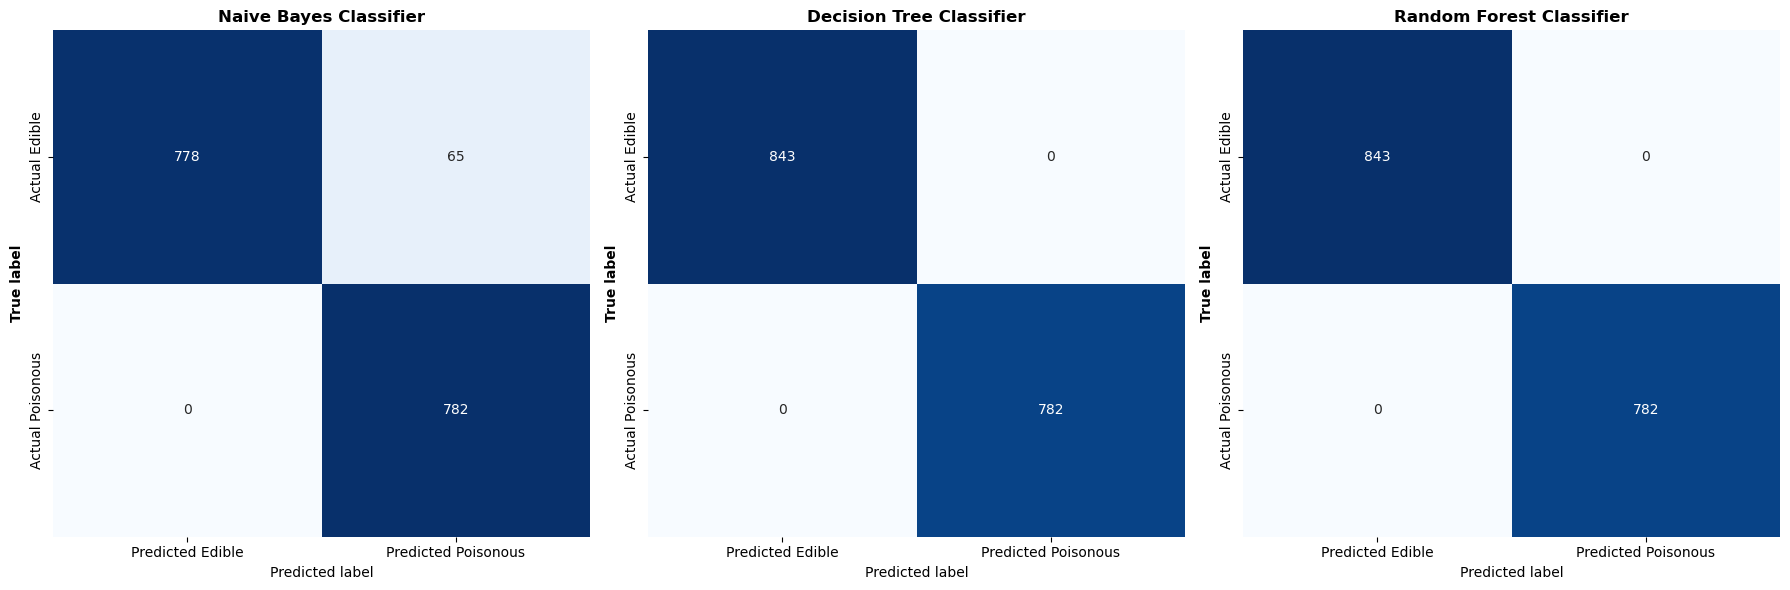

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_cm(ax, conf_matrix, title):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Edible', 'Predicted Poisonous'],
                yticklabels=['Actual Edible', 'Actual Poisonous'], ax=ax)
    ax.set_title(title, fontweight='bold')  # Make title bold
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label', fontweight='bold')  # Make ylabel bold

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting Confusion Matrix for Naive Bayes Classifier
plot_cm(axes[0], confusion_matrix_nb, 'Naive Bayes Classifier')

# Plotting Confusion Matrix for Decision Tree Classifier
plot_cm(axes[1], confusion_matrix_dt, 'Decision Tree Classifier')

# Plotting Confusion Matrix for Random Forest Classifier
plot_cm(axes[2], confusion_matrix_rf, 'Random Forest Classifier')

# Adjust layout
plt.tight_layout()
plt.show()




In [137]:
# Apply one-hot encoding to the categorical columns
X_onehot = pd.get_dummies(mushroom_data.iloc[:, 1:])  # Exclude the target variable for encoding

# Calculate the correlation matrix for the one-hot encoded features
correlation_matrix_onehot = X_onehot.corr()

# use 0.8 as threshold for identifying high correlations
high_corr_threshold = 0.8

# Find pairs of features with high correlation
mask = np.triu(np.ones_like(correlation_matrix_onehot, dtype=bool), k=1)
high_corr_pairs = correlation_matrix_onehot.where(mask).stack()
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs) > high_corr_threshold]

# Print the pairs of features with high correlations
print("Pairs of features with high correlation:")
print(high_corr_pairs.sort_values(ascending=False))


Pairs of features with high correlation:
stalk-color-below-ring_c    ring-number_n                 1.000000
odor_m                      stalk-color-below-ring_c      1.000000
                            ring-number_n                 1.000000
                            ring-type_n                   1.000000
stalk-color-above-ring_y    veil-color_y                  1.000000
stalk-color-above-ring_o    stalk-color-below-ring_o      1.000000
stalk-color-above-ring_c    ring-type_n                   1.000000
                            ring-number_n                 1.000000
ring-number_n               ring-type_n                   1.000000
stalk-color-below-ring_c    ring-type_n                   1.000000
stalk-color-above-ring_c    stalk-color-below-ring_c      1.000000
odor_m                      stalk-color-above-ring_c      1.000000
gill-attachment_a           stalk-color-above-ring_o      0.955097
                            stalk-color-below-ring_o      0.955097
gill-attachment_f    